# Value iteration DP - Gambler's Problem

This is exercice 4.9 from the book "Reinforcement Learning: an itroduction. From Sutton and Barto. The problem is extracted from the book as following:

___
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, s ∈ {1, 2, . . . , 99} and the actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let ph denote the probability of the coin coming up heads.

Implement value iteration for the gambler’s problem and solve it for ph = 0.25 and ph = 0.55. Show your results graphically, as in Figure 4.3. Are your results stable as θ → 0?

___

This is a case of Finite Markov Decision Problem (Finite MDP). Finite meaning that we know all the possible set of states S, actions A an rewards R. A Markov Decision Process can be thought as a decision making process in which actions not only influence the immediate reward (as in a "bandit" problem) but also affect subsequent states and rewards. Moreover, actions may have different results in different states and even in the same state. 

MDPs are not solved by optimizing the immediate reward of each action, but the long term reward of following a specific set of actions, the policy.

Finite Markov Decision Problems can be characterized by the following equation:

$$\sum_{s'\in S}\sum_{r\in R} p(s', r \mid s,a) = 1,  \forall  s \in S, a \in A$$ 

As stated above, a MDP tries to maximize the long term rewards, also called the return. This can be stated as G_T:

$$ G_T = \sum_{k=0}^{\infty} \gamma^{k}*R_{t+k+1}$$

Where γ (0>γ>1 )is called the discount factor and is used to give more weight to recent rewards rather than long past rewards. Also, it helps to ensure convergence when time is infinite.

With the Finite MDP formula and the return we can deduce the Bellman Equation:

$$ V_{\pi}(s) = E_{\pi}[G_t \mid S_t = s] $$

$$ V_{\pi}(s) = E_{\pi}[R_{t+1} + \gamma G_{t+1}\mid S_t = s] $$

$$ V_{\pi}(s) = \sum_{a}\pi(a\mid s)\sum_{s',r} p(s', r \mid s,a)[r + \gamma E_{\pi}[G_{t+1}\mid S_{t+1} = s']] $$

We can notice the recurrence of the formula and write it as:

$$ V_{\pi}(s) = \sum_{a}\pi(a\mid s)\sum_{s',r} p(s', r \mid s,a)[r +\gamma V_{\pi}(s')], \forall s \in S $$

We call V the set of values of the states. Each state has a value considereing how much long term reward we can expect by just reaching that state and following the polici π thereafter.

We can turn the Bellman Equation into an iteration algorithm that tries to find the optimal policy and state-value set by using the Bellman equation into an update rule using the action that maximes the reward at each step. If we do this for all the states for long enought, convergence is assured.

$$ v_{k+1}(s) = \max_a E[R_{t+1}+ \gamma v_k(S_{t+1})\mid S_t = s, A_t = a]$$

$$v_{k+1}(s) = \max_a\sum_{s', r} p(s',r \mid s,a)[r +\gamma V_{k}(s')] \forall s \in S$$

Roughly speaking, at each iteration we set the value of each state to be the weighted probabilities of each possible next state-reward combination times the reward and the discounted next state (taken from the previously stored iteration). We do this process until the states change little bit.
This process is called **Dynamic Programming by Value Iteration**. 

Dynamic programming refers to a set of algorithms to solve finite MDPs for which we have a complete model by means of estimating the value funciton of each state using iterative process like the one described above.

___

Below follows a simple implentation of this algorithm for the Gambler's Problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize(states = 100, max_reward = 1):
    """
    Creates the arbitrary set of initial states, last one is put to 
    the winning reward as it is the dummy state of already won
    """
    V = np.zeros(states+1)
    V[-1] = max_reward
    return V

In [3]:
def compute_Bellman(V, s, pheads, gamma):
    """
    Computes the Bellman iteration rule with the current set of states V, 
    for the specied state s. It uses the probabilities of winning as pheads and
    gamma as the discounting factor.
    """
    tempV = []
    for a in range(1,min(100-s, s)+1):
        tempV.append(pheads*(0 + gamma*V[s+a]) + (1-pheads)*(0+gamma*V[s-a]))
    return tempV

In [4]:
def value_iteration(V, pheads, gamma = 1, sigma = 0.1):
    """
    This function computes the value iteration algorithm for a set of 
    states V, using the winning probability of pheads, the discouting 
    factor gamma. Sigma is a threshold that ensures convergence as we keep 
    iterating until the maximum difference between all values and its 
    corresponding newly predicted is less than sigma. 
    """
    while True:
        delta = 0
        for s in range(1,len(V)-1):
            v = V[s]
            expected_value = compute_Bellman(V, s, pheads, gamma)
            V[s] = max(expected_value)
            delta = max(delta, abs(v - V[s]))
        if delta > sigma:
            continue
        else:
            return V

In [5]:
def retrieve_policy(V, pheads, gamma):
    """
    This function takes the set of states V, the probability of winning 
    pheads and the discounting factor gamma and retrieves the optimal policy
    that the set of states describe by using a greedy approach. This works 
    because the action that maximies the next value at each step builds the 
    optimal policy if the state sets is optimal.
    """
    pi = np.zeros(100)
    for s in range(1,len(pi)):
        expected_value = compute_Bellman(V, s, pheads, gamma)
        pi[s] = np.argmax(expected_value) + 1
    return pi

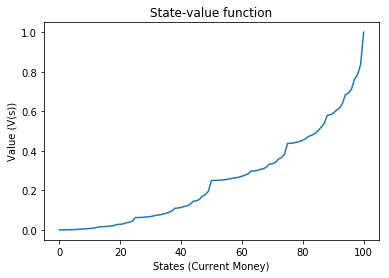

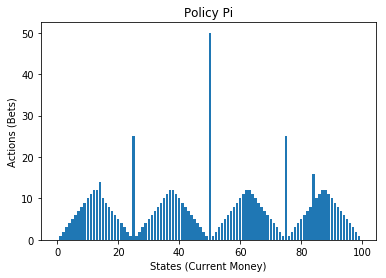

In [6]:
V = initialize(max_reward = 10e10)
V = value_iteration(V, pheads = 0.25, sigma = 10e-20, gamma = 1)
pi = retrieve_policy(V, pheads = 0.25, gamma = 1)

plt.plot(V/max(V))
plt.xlabel('States (Current Money)')
plt.ylabel('Value (V(s))')
plt.title('State-value function')
plt.show()

plt.bar(range(100), height = pi)
plt.xlabel('States (Current Money)')
plt.ylabel('Actions (Bets)')
plt.title('Policy Pi')
plt.show()

In the state-value function we can see how the value of the states improves as we get more money. In fact, as only reward it gets is +1 if the agent wins, the value of each state is the probability of winning from that state and following the policy. In this case we used a reward of 10e10 instead of 1 because we can ensure this way that the rewards are calculated with more decimal points before losing precision, but the idea remains the same. If we didn't the policy would have some errors.

In the plot about the policy we can see a very corious shape. It's clear that the agent tries to reach quickly certain states and then it plays safe until reaching other peak. For example at 50 it bets it all because of it wins it reaches the desired 100. But if it has only 49 it first tries to bet 1 to try to reach the 50, because if it fails it can continue playing. 

If we do the same for pheads = 0.55:

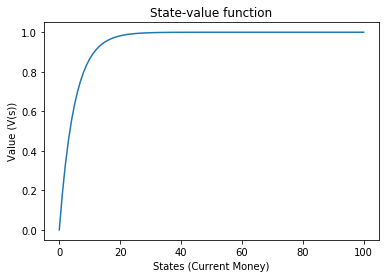

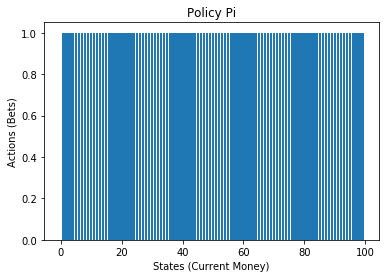

In [7]:
V = initialize(max_reward = 10e10)
V = value_iteration(V, pheads = 0.55, sigma = 10e-20, gamma = 1)
pi = retrieve_policy(V, pheads = 0.55, gamma = 1)

plt.plot(V/max(V))
plt.xlabel('States (Current Money)')
plt.ylabel('Value (V(s))')
plt.title('State-value function')
plt.show()

plt.bar(range(100), height = pi)
plt.xlabel('States (Current Money)')
plt.ylabel('Actions (Bets)')
plt.title('Policy Pi')
plt.show()

We can see that because we have at each step more probabilities of winning than losing, we quickly reach a high value score. 
Furthermore, the policy becomes trivial. We just have to bet 1 all the time. In the long term, this is the safest way of reaching the desired 100 goal.